In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Table of Contents
>## 1. Hyperparameter Tuning - `Scikit-Learn`
* 1.1. `validation_curve`
* 1.2. `GridSearchCV`
* 1.3. `ParameterGrid`

# 1. Hyperparameter Tuning - `Scikit-Learn`

## 1.1. `validation_curve` 
* **Parameters**:
  * `param_name`: name of the parameter
  * `param_range`: its range
  * `scoring`: performance metric

In [2]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 10)

In [3]:
%%time
train_scores, test_scores = \
    validation_curve(SVC(), X, y, 
                     param_name="gamma", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=1)

CPU times: user 47.2 s, sys: 270 ms, total: 47.5 s
Wall time: 48 s


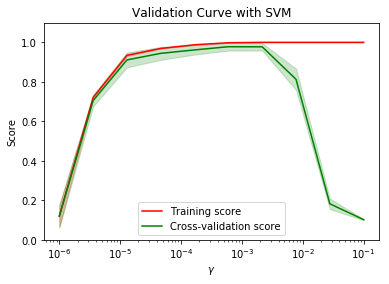

In [4]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

## 1.2. `GridSearchCV`
* **Wrapper** style class
* **`fit` method**: generates multiple models & run optimization
* **Attributes**:
  * `grid_scores_`: performance of every parameter combination, tuple of (parameters, mean_validation_score, cv_validation_scores)
  * `best_score_`: best score
  * `best_params_`: best parameter
  * `best_estimator_`: best model

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=1)
%time gs = gs.fit(X, y)

CPU times: user 5min 50s, sys: 1.05 s, total: 5min 51s
Wall time: 5min 54s


In [6]:
gs.cv_results_["params"]

[{'clf__C': 0.0001, 'clf__kernel': 'linear'},
 {'clf__C': 0.001, 'clf__kernel': 'linear'},
 {'clf__C': 0.01, 'clf__kernel': 'linear'},
 {'clf__C': 0.1, 'clf__kernel': 'linear'},
 {'clf__C': 1.0, 'clf__kernel': 'linear'},
 {'clf__C': 10.0, 'clf__kernel': 'linear'},
 {'clf__C': 100.0, 'clf__kernel': 'linear'},
 {'clf__C': 1000.0, 'clf__kernel': 'linear'},
 {'clf__C': 0.0001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 1.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 10.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 100.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.0001, 'clf__gamma': 1000.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'},
 {'clf__C': 0.001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'},
 {'clf__C

In [7]:
gs.cv_results_["mean_test_score"]

array([0.20868114, 0.91819699, 0.95269894, 0.95826377, 0.95826377,
       0.95826377, 0.95826377, 0.95826377, 0.11908737, 0.12020033,
       0.1213133 , 0.10350584, 0.10127991, 0.11185309, 0.10183639,
       0.10127991, 0.11908737, 0.12020033, 0.1213133 , 0.10350584,
       0.10127991, 0.11185309, 0.10183639, 0.10127991, 0.11908737,
       0.12020033, 0.13967724, 0.10350584, 0.10127991, 0.11185309,
       0.10183639, 0.10127991, 0.11908737, 0.68614357, 0.91207568,
       0.40567613, 0.10127991, 0.11185309, 0.10183639, 0.10127991,
       0.70339455, 0.93266555, 0.9638286 , 0.90984975, 0.11908737,
       0.10127991, 0.10127991, 0.10127991, 0.934335  , 0.95659432,
       0.97161937, 0.9115192 , 0.12966055, 0.10127991, 0.10127991,
       0.10127991, 0.95548136, 0.96160267, 0.97161937, 0.9115192 ,
       0.12966055, 0.10127991, 0.10127991, 0.10127991, 0.95993322,
       0.96215915, 0.97161937, 0.9115192 , 0.12966055, 0.10127991,
       0.10127991, 0.10127991])

In [8]:
print(gs.best_score_)
print(gs.best_params_)

0.9716193656093489
{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


### Parallel Processing
* In `GridSearchCV`, set `n_jobs` parameter to use parallel processing

In [12]:
param_grid = {"gamma": np.logspace(-6, -1, 10)}
gs1 = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=1)
gs2 = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=2)

In [13]:
%%time
gs1.fit(X, y)

CPU times: user 19.1 s, sys: 25.8 ms, total: 19.2 s
Wall time: 19.2 s


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([1.00000e-06, 3.59381e-06, 1.29155e-05, 4.64159e-05, 1.66810e-04,
       5.99484e-04, 2.15443e-03, 7.74264e-03, 2.78256e-02, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [14]:
%%time
gs2.fit(X, y)

CPU times: user 261 ms, sys: 63.1 ms, total: 324 ms
Wall time: 10.2 s


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'gamma': array([1.00000e-06, 3.59381e-06, 1.29155e-05, 4.64159e-05, 1.66810e-04,
       5.99484e-04, 2.15443e-03, 7.74264e-03, 2.78256e-02, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

## 1.3. `ParameterGrid` 
* Works as **iterator** for grid search

In [9]:
from sklearn.model_selection import ParameterGrid

In [10]:
param_grid = {'a': [1, 2], 'b': [True, False]}
list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [11]:
param_grid = [{'kernel': ['linear']}, {'kernel': ['rbf'], 'gamma': [1, 10]}]
list(ParameterGrid(param_grid))

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 10, 'kernel': 'rbf'}]